<a href="https://colab.research.google.com/github/mariemadel/Terrorist-Group-Prediction-in-Middle-East-and-North-Africa/blob/master/assignment_3final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# upload kaggle and set permissions

---









In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json
-rw-r--r-- 1 root root 66 Dec 10 22:18 kaggle.json


# DownLoad the datasets 
---



In [0]:
!kaggle datasets download -d START-UMD/gtd
!mkdir gtd2017
!unzip gtd -d gtd2017


 59% 17.0M/28.7M [00:00<00:00, 25.2MB/s]
100% 28.7M/28.7M [00:00<00:00, 53.2MB/s]
Archive:  gtd.zip
  inflating: gtd2017/globalterrorismdb_0718dist.csv  


In [0]:
!kaggle datasets download -d unsdsn/world-happiness
!mkdir world-happiness-folder
!unzip world-happiness -d world-happiness-folder


  0% 0.00/36.8k [00:00<?, ?B/s]
100% 36.8k/36.8k [00:00<00:00, 31.9MB/s]
Archive:  world-happiness.zip
  inflating: world-happiness-folder/2015.csv  
  inflating: world-happiness-folder/2016.csv  
  inflating: world-happiness-folder/2017.csv  
  inflating: world-happiness-folder/2018.csv  
  inflating: world-happiness-folder/2019.csv  


# Read datasets

---



In [0]:
import pandas as pd
import numpy as np
gtdPath = 'gtd2017/globalterrorismdb_0718dist.csv'
gtd2017 = pd.read_csv(gtdPath,encoding='latin1')
gtd2017DF=pd.DataFrame(gtd2017)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Features in GTD

---



In [0]:
for column in gtd2017DF:
  print(column)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

In [0]:
print(gtd2017DF[["guncertain1"]])

        guncertain1
0               0.0
1               0.0
2               0.0
3               0.0
4               0.0
...             ...
181686          0.0
181687          0.0
181688          0.0
181689          0.0
181690          0.0

[181691 rows x 1 columns]


# select wanted data from gtd dataset

---



In [0]:
#Select mena region countries 
gtd2017DF = gtd2017DF.loc[gtd2017DF['region_txt'] == 'Middle East & North Africa']
#Select new data (happened after 2000)
gtd2017DF = gtd2017DF.loc[gtd2017DF['iyear'] > 1999 ]
#filter data
gtd2017DF = gtd2017DF.loc[gtd2017DF['country_txt'] != 'Israel']
#select wanted features
gtd2017Selected = gtd2017DF[["weaptype1","country","city","success","targtype1","iyear","gname","nkill","nwound"]]
gtd2017Selected = gtd2017Selected.dropna()
gtd2017SelectedEncoded = gtd2017Selected.copy()
display(gtd2017Selected)

,weaptype1,country,city,success,targtype1,iyear,gname,nkill,nwound
69843,6,209,Istanbul,1,1,2000,Unknown,0.0,0.0
69864,9,6,El Omaria,1,14,2000,Unknown,5.0,0.0
69872,5,6,Germain,1,1,2000,Unknown,6.0,14.0
69876,6,228,Aden,0,4,2000,Al-Qaida,0.0,0.0
69897,6,95,Kalar District,0,14,2000,Muslim extremists,1.0,0.0
...,...,...,...,...,...,...,...,...,...
181670,13,95,Hawd al-Waqf,1,3,2017,Islamic State of Iraq and the Levant (ISIL),1.0,0.0
181671,6,95,Farhatiyah,1,14,2017,Islamic State of Iraq and the Levant (ISIL),4.0,9.0
181674,13,95,Baaj,0,4,2017,Islamic State of Iraq and the Levant (ISIL),5.0,0.0
181679,5,95,Muqdadiyah,0,4,2017,Islamic State of Iraq and the Levant (ISIL),13.0,0.0


# Encoding Country names to int values

---



## build dictionary to none numerical data

---



In [0]:
tempcountryEncodingList = gtd2017DF[["country_txt","country"]].values
tempcountryEncodingList = tempcountryEncodingList[np.argsort(tempcountryEncodingList[:, 1])]
tempCountryName = tempcountryEncodingList[:,0]
tempCoutryCode = tempcountryEncodingList[:,1]
tempCountryName=np.unique(tempCountryName)
tempCoutryCode=np.unique(tempCoutryCode)
countryEncodingList = {k:v for k, v in zip(tempCountryName, tempCoutryCode)}
countryEncodingList.update( {'Palestinian Territories' : countryEncodingList.get('West Bank and Gaza Strip')} )
for k, v in countryEncodingList.items():
    print(k, v)

Algeria 6
Bahrain 18
Egypt 60
International 94
Iran 95
Iraq 102
Jordan 106
Kuwait 110
Lebanon 113
Libya 136
Morocco 155
Qatar 164
Saudi Arabia 173
Syria 200
Tunisia 208
Turkey 209
United Arab Emirates 215
West Bank and Gaza Strip 228
Western Sahara 349
Yemen 422
Palestinian Territories 228


In [0]:
tempCityEncodingList = gtd2017Selected[["city"]].values
tempCityEncodingList=np.unique(tempCityEncodingList)
tempNum = np.arange(len(tempCityEncodingList))
cityEncodingList= {k:v for k, v in zip(tempCityEncodingList,tempNum)}
for k, v in cityEncodingList.items():
    print(k, v)

#countryEncodingList = np.vstack((tempCountryName,tempCoutryCode))

Aabde 0
Aabdeh 1
Aadaisse 2
Aaitraroun 3
Aakherobh 4
Aali 5
Aalos 6
Aaloucha 7
Abadan 8
Abadi 9
Abali 10
Abar Sadiyah 11
Abasan 12
Abasan al-Sair 13
Abasiyah 14
Abbarah 15
Abbasi 16
Abd Wayis 17
Abdallah Jubarah 18
Abdiyah district 19
Abdul Karim 20
Aben 21
Abha 22
Abkaziyah 23
Abou El Hassen 24
Abou Qorqas 25
Aboud 26
Abqaiq 27
Abr district 28
Abrah Aziz 29
Abs district 30
Abtha 31
Abu Adh Dhuhur 32
Abu Al Khasib 33
Abu Al-Khasib 34
Abu Arish 35
Abu Darujah 36
Abu Dhabi 37
Abu Dis 38
Abu Fas 39
Abu Fishkah 40
Abu Fleis 41
Abu Gharah 42
Abu Gharaq 43
Abu Ghraib 44
Abu Ghraib district 45
Abu Hadi 46
Abu Hammad 47
Abu Hummus 48
Abu Jair 49
Abu Jaradi 50
Abu Kabir 51
Abu Karma 52
Abu Karmah 53
Abu Khamis 54
Abu Khanazir 55
Abu Khashab 56
Abu Kibir 57
Abu Maria 58
Abu Mohammed 59
Abu Najim 60
Abu Qir 61
Abu Qurayn 62
Abu Saada 63
Abu Saiba 64
Abu Sanam 65
Abu Sayda 66
Abu Saydah 67
Abu Siba 68
Abu Soweir 69
Abu Tabah 70
Abu Tawilah 71
Abu Yacoub 72
Abu Zabal 73
Abu al Khaseeb 74
Abu al Kha

In [0]:
tempGroupEncodingList = gtd2017Selected[["gname"]].values
tempGroupEncodingList=np.unique(tempGroupEncodingList)
tempNum = np.arange(len(tempGroupEncodingList))
groupEncodingList= {k:v for k, v in zip(tempGroupEncodingList,tempNum)}
for k, v in groupEncodingList.items():
    print(k, v)

14 March Coalition 0
1920 Revolution Brigades 1
313 Brigade (Syria) 2
Abdul Ghani Kikli Militia 3
Abdul Qader Husseini Battalions of the Free Palestine movement 4
Abdullah Azzam Brigades 5
Abida Tribe 6
Abu Abbas Brigade 7
Abu Amarah Battalion 8
Abu Bakr Unis Jabr Brigade 9
Abu Jaafar al-Mansur Brigades 10
Abu Obaida bin Jarrah Brigade 11
Abu Salim Martyr's Brigade 12
Adan Abyan Islamic Army (AAIA) 13
Adan-Abyan Province of the Islamic State 14
Ahneish Militia 15
Ahrar Al-Jalil (Free People of the Galilee) 16
Ahrar al-Sham 17
Aibed Er-Rahman katibet 18
Aisha Umm-al Mouemeneen (Brigades of Aisha) 19
Ajnad Misr 20
Ajnad al-Sham 21
Al Bayda Province of the Islamic State 22
Al Zawahiri Loyalists 23
Al-Ahwaz Arab People's Democratic Front 24
Al-Aqsa Martyrs Brigade 25
Al-Ashtar Brigades 26
Al-Bakazim 27
Al-Fatah 28
Al-Fateh Al-Jadid 29
Al-Fatihin Army (AFA) 30
Al-Furqan (Tunisia) 31
Al-Furqan Brigades 32
Al-Haramayn Brigades 33
Al-Haydariyah Battalion 34
Al-Islah Party 35
Al-Jub Tribe 36
Al

## encoding data

---



In [0]:
newCity = np.vectorize(cityEncodingList.get)(gtd2017Selected[["city"]])
gtd2017SelectedEncoded[["city"]] = newCity
newGname = np.vectorize(groupEncodingList.get)(gtd2017Selected[["gname"]])
gtd2017SelectedEncoded[["gname"]] = newGname


In [0]:
display(gtd2017SelectedEncoded)

,weaptype1,country,city,success,targtype1,iyear,gname,nkill,nwound
69843,6,209,2093,1,1,2000,353,0.0,0.0
69864,9,6,1567,1,14,2000,353,5.0,0.0
69872,5,6,1692,1,1,2000,353,6.0,14.0
69876,6,228,96,0,4,2000,42,0.0,0.0
69897,6,95,2265,0,14,2000,250,1.0,0.0
...,...,...,...,...,...,...,...,...,...
181670,13,95,1909,1,3,2017,167,1.0,0.0
181671,6,95,1641,1,14,2017,167,4.0,9.0
181674,13,95,858,0,4,2017,167,5.0,0.0
181679,5,95,2907,0,4,2017,167,13.0,0.0


In [0]:
frequency=gtd2017SelectedEncoded["gname"].value_counts()


In [0]:
wh2015Path = 'world-happiness-folder/2015.csv'
wh2015 = pd.read_csv(wh2015Path,encoding='latin1')
wh2016Path = 'world-happiness-folder/2016.csv'
wh2016 = pd.read_csv(wh2016Path,encoding='latin1')
wh2017Path = 'world-happiness-folder/2017.csv'
wh2017 = pd.read_csv(wh2017Path,encoding='latin1')
wh2015DF=pd.DataFrame(wh2015)
wh2016DF=pd.DataFrame(wh2016)
wh2017DF=pd.DataFrame(wh2017)

# Features in world happiness 

---



## 2015

---



In [0]:
for column in wh2015:
  print(column)

Country
Region
Happiness Rank
Happiness Score
Standard Error
Economy (GDP per Capita)
Family
Health (Life Expectancy)
Freedom
Trust (Government Corruption)
Generosity
Dystopia Residual


## 2016

---



In [0]:
for column in wh2016:
  print(column)

Country
Region
Happiness Rank
Happiness Score
Lower Confidence Interval
Upper Confidence Interval
Economy (GDP per Capita)
Family
Health (Life Expectancy)
Freedom
Trust (Government Corruption)
Generosity
Dystopia Residual


## 2017

---



In [0]:
for column in wh2017:
  print(column)


Country
Happiness.Rank
Happiness.Score
Whisker.high
Whisker.low
Economy..GDP.per.Capita.
Family
Health..Life.Expectancy.
Freedom
Generosity
Trust..Government.Corruption.
Dystopia.Residual


### Select from WHR

---



# 2015

---



In [0]:
#Select mena region countries 
wh2015DF = wh2015DF.loc[wh2015DF['Region'] == 'Middle East and Northern Africa']
#filter data
wh2015DF = wh2015DF.loc[wh2015DF['Country'] != 'Israel']
#select wanted features
wh2015Selected = wh2015DF[["Country","Happiness Score","Freedom","Economy (GDP per Capita)","Trust (Government Corruption)"]]
wh2015SelectedArray = wh2015Selected.values
display(wh2015Selected)

,Country,Happiness Score,Freedom,Economy (GDP per Capita),Trust (Government Corruption)
19,United Arab Emirates,6.901,0.64157,1.42727,0.38583
21,Oman,6.853,0.63274,1.36011,0.32524
27,Qatar,6.611,0.64040,1.69042,0.52208
34,Saudi Arabia,6.411,0.31048,1.39541,0.32524
38,Kuwait,6.295,0.55499,1.55422,0.25609
48,Bahrain,5.960,0.45492,1.32376,0.30600
62,Libya,5.754,0.41668,1.13145,0.11023
67,Algeria,5.605,0.28579,0.93929,0.17383
75,Turkey,5.332,0.22815,1.06098,0.15746
81,Jordan,5.192,0.40661,0.90198,0.14293


## encode 2015

---


In [0]:
wh2015Selected = wh2015Selected.replace({"Country":countryEncodingList})
display(wh2015Selected)


,Country,Happiness Score,Freedom,Economy (GDP per Capita),Trust (Government Corruption)
19,215,6.901,0.64157,1.42727,0.38583
21,Oman,6.853,0.63274,1.36011,0.32524
27,164,6.611,0.64040,1.69042,0.52208
34,173,6.411,0.31048,1.39541,0.32524
38,110,6.295,0.55499,1.55422,0.25609
48,18,5.960,0.45492,1.32376,0.30600
62,136,5.754,0.41668,1.13145,0.11023
67,6,5.605,0.28579,0.93929,0.17383
75,209,5.332,0.22815,1.06098,0.15746
81,106,5.192,0.40661,0.90198,0.14293


# 2016

---



In [0]:
#Select mena region countries 
wh2016DF = wh2016DF.loc[wh2016DF['Region'] == 'Middle East and Northern Africa']
#filter data
wh2016DF = wh2016DF.loc[wh2016DF['Country'] != 'Israel']
#select wanted features
wh2016Selected = wh2016DF[["Country","Happiness Score","Freedom","Economy (GDP per Capita)","Trust (Government Corruption)"]]
wh2016SelectedArray = wh2016Selected.values
print(wh2016SelectedArray)

[['United Arab Emirates' 6.5729999999999995 0.56215 1.57352 0.35561]
 ['Saudi Arabia' 6.379 0.37904 1.48953 0.30008]
 ['Qatar' 6.375 0.56679 1.82427 0.48049]
 ['Algeria' 6.355 0.21006 1.05266 0.16157]
 ['Kuwait' 6.239 0.43166000000000004 1.61714 0.23669]
 ['Bahrain' 6.218 0.47375 1.44024 0.25772]
 ['Libya' 5.615 0.40671999999999997 1.0668799999999998
  0.10339000000000001]
 ['Turkey' 5.388999999999999 0.23889000000000002 1.1649200000000002
  0.12347999999999999]
 ['Jordan' 5.303 0.36023 0.9967299999999999 0.13297]
 ['Morocco' 5.151 0.25645999999999997 0.8405799999999999 0.08404]
 ['Lebanon' 5.129 0.26228 1.12268 0.030610000000000002]
 ['Tunisia' 5.045 0.23553000000000002 0.97724 0.0817]
 ['Iran' 4.813 0.22544 1.11758 0.0557]
 ['Palestinian Territories' 4.754 0.17744000000000001 0.67024 0.10613]
 ['Iraq' 4.575 0.24856 1.07474 0.13635999999999998]
 ['Egypt' 4.362 0.18847 0.95395 0.10393]
 ['Yemen' 3.7239999999999998 0.2287 0.57939 0.05892000000000001]
 ['Syria' 3.069 0.06912 0.7471899999

## encode 2016

---



In [0]:
newCountry = np.vectorize(countryEncodingList.get)(wh2016Selected[["Country"]])
wh2016Selected[["Country"]] = newCountry

print(wh2016Selected)

     Country  ...  Trust (Government Corruption)
27       215  ...                        0.35561
33       173  ...                        0.30008
35       164  ...                        0.48049
37         6  ...                        0.16157
40       110  ...                        0.23669
41        18  ...                        0.25772
66       136  ...                        0.10339
77       209  ...                        0.12348
79       106  ...                        0.13297
89       155  ...                        0.08404
92       113  ...                        0.03061
97       208  ...                        0.08170
104       95  ...                        0.05570
107      228  ...                        0.10613
111      102  ...                        0.13636
119       60  ...                        0.10393
146      422  ...                        0.05892
155      200  ...                        0.17233

[18 rows x 5 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


# 2017

---



In [0]:
menaCountries = [' Algeria','Oman','Turkey','Bahrain','Jordan','Palestinian Territories','United Arab Emirates','Kuwait','Qatar',' Yemen','Egypt','Lebanon','Saudi Arabia','Iran','Libya','Syria','Iraq','Morocco',' Tunisia']

In [0]:
#Select mena region countries 
wh2017DF = wh2017DF.loc[wh2017DF['Country'].isin(menaCountries)]
#select wanted features
wh2017Selected = wh2017DF[["Country","Happiness.Score","Freedom","Economy..GDP.per.Capita.","Trust..Government.Corruption."]]
wh2017SelectedArray = wh2017Selected.values
print(wh2017SelectedArray)

[['United Arab Emirates' 6.6479997634887695 0.60834527015686
  1.6263433694839498 0.324489563703537]
 ['Qatar' 6.375 0.604130983352661 1.8707656860351598 0.43929925560951205]
 ['Saudi Arabia' 6.343999862670901 0.449750572443008 1.53062355518341
  0.27343225479126004]
 ['Kuwait' 6.10500001907349 0.49633759260177596 1.63295245170593
  0.21515955030918102]
 ['Bahrain' 6.08699989318848 0.536746919155121 1.4884122610092199
  0.257042169570923]
 ['Libya' 5.525000095367429 0.465733230113983 1.1018030643463101
  0.0926102101802826]
 ['Turkey' 5.5 0.300740599632263 1.1982743740081798 0.0996715798974037]
 ['Jordan' 5.33599996566772 0.418421149253845 0.9910123944282528
  0.11980327218771002]
 ['Morocco' 5.2350001335144 0.408158332109451 0.8781145811080929
  0.0877631828188896]
 ['Lebanon' 5.22499990463257 0.28851598501205394 1.07498753070831
  0.037513829767704]
 ['Palestinian Territories' 4.77500009536743 0.25471106171608
  0.716249227523804 0.0892826020717621]
 ['Egypt' 4.7350001335144 0.282110

## encode 2017

---



In [0]:
wh2017Selected = wh2017Selected.replace({"Country":countryEncodingList})
print(wh2017Selected)

     Country  ...  Trust..Government.Corruption.
20       215  ...                       0.324490
34       164  ...                       0.439299
36       173  ...                       0.273432
38       110  ...                       0.215160
40        18  ...                       0.257042
67       136  ...                       0.092610
68       209  ...                       0.099672
73       106  ...                       0.119803
83       155  ...                       0.087763
87       113  ...                       0.037514
102      228  ...                       0.089283
103       60  ...                       0.114381
107       95  ...                       0.048761
116      102  ...                       0.107216
151      200  ...                       0.151347

[15 rows x 5 columns]


In [0]:
result=frequency.argsort()[0:5].index
#print(result)
finalgtd=gtd2017SelectedEncoded[gtd2017SelectedEncoded['gname'].isin(result)]
print(finalgtd)
#print(finalgtd.shape)

        weaptype1  country  city  success  ...  iyear  gname  nkill  nwound
69843           6      209  2093        1  ...   2000    353    0.0     0.0
69864           9        6  1567        1  ...   2000    353    5.0     0.0
69872           5        6  1692        1  ...   2000    353    6.0    14.0
69904           5      209  2093        1  ...   2000    353    0.0     0.0
69952          13      228  4042        1  ...   2000    353    0.0     0.0
...           ...      ...   ...      ...  ...    ...    ...    ...     ...
181669          6       95  2468        1  ...   2017    353    0.0     5.0
181670         13       95  1909        1  ...   2017    167    1.0     0.0
181671          6       95  1641        1  ...   2017    167    4.0     9.0
181674         13       95   858        0  ...   2017    167    5.0     0.0
181679          5       95  2907        0  ...   2017    167   13.0     0.0

[31488 rows x 9 columns]


In [0]:
#import datetime as dt
#gtd2017SelectedEncoded['iyear']= pd.to_datetime(gtd2017SelectedEncoded['iyear']) 
trainingSeti = finalgtd[finalgtd['iyear']<=2016]
testSeti = finalgtd[finalgtd['iyear']==2017]
#print(gtd2017SelectedEncoded)



In [0]:
print(trainingSeti)

        weaptype1  country  city  success  ...  iyear  gname  nkill  nwound
69843           6      209  2093        1  ...   2000    353    0.0     0.0
69864           9        6  1567        1  ...   2000    353    5.0     0.0
69872           5        6  1692        1  ...   2000    353    6.0    14.0
69904           5      209  2093        1  ...   2000    353    0.0     0.0
69952          13      228  4042        1  ...   2000    353    0.0     0.0
...           ...      ...   ...      ...  ...    ...    ...    ...     ...
170777          6       95   884        1  ...   2016    353    2.0     0.0
170778          6       95   884        1  ...   2016    167   15.0    22.0
170779          6       95   884        1  ...   2016    167   15.0    21.0
170780          6       95   884        1  ...   2016    353    4.0     0.0
170781          6       95   884        1  ...   2016    353    1.0     7.0

[28410 rows x 9 columns]


In [0]:
finalgtd.rename(columns={'country':'Country'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [0]:
wh2017Selected.rename(columns={'Happiness.Score':'Happiness Score','Economy..GDP.per.Capita.':'Economy (GDP per Capita)','Trust..Government.Corruption.':'Trust (Government Corruption)'}, inplace=True)

In [0]:
print(finalgtd)
tempGTD2015 = finalgtd[finalgtd['iyear']==2015]
tempGTD2016 = finalgtd[finalgtd['iyear']==2016]
tempGTD2017 = finalgtd[finalgtd['iyear']==2017]

finalGTD2015 = pd.merge(tempGTD2015, wh2015Selected, on="Country")
finalGTD2016 = pd.merge(tempGTD2016, wh2016Selected, on="Country")
finalGTD2017 = pd.merge(tempGTD2017, wh2017Selected, on="Country")

display(finalGTD2015)
print(finalGTD2016)
print(finalGTD2017)


        weaptype1  Country  city  success  ...  iyear  gname  nkill  nwound
69843           6      209  2093        1  ...   2000    353    0.0     0.0
69864           9        6  1567        1  ...   2000    353    5.0     0.0
69872           5        6  1692        1  ...   2000    353    6.0    14.0
69904           5      209  2093        1  ...   2000    353    0.0     0.0
69952          13      228  4042        1  ...   2000    353    0.0     0.0
...           ...      ...   ...      ...  ...    ...    ...    ...     ...
181669          6       95  2468        1  ...   2017    353    0.0     5.0
181670         13       95  1909        1  ...   2017    167    1.0     0.0
181671          6       95  1641        1  ...   2017    167    4.0     9.0
181674         13       95   858        0  ...   2017    167    5.0     0.0
181679          5       95  2907        0  ...   2017    167   13.0     0.0

[31488 rows x 9 columns]


,weaptype1,Country,city,success,targtype1,iyear,gname,nkill,nwound,Happiness Score,Freedom,Economy (GDP per Capita),Trust (Government Corruption)
0,6,95,884,1,14,2015,353,2.0,5.0,4.686,0.30033,1.00880,0.05863
1,6,95,884,1,8,2015,353,1.0,1.0,4.686,0.30033,1.00880,0.05863
2,6,95,884,1,1,2015,353,3.0,8.0,4.686,0.30033,1.00880,0.05863
3,6,95,884,1,14,2015,353,1.0,6.0,4.686,0.30033,1.00880,0.05863
4,6,95,884,1,1,2015,353,1.0,6.0,4.686,0.30033,1.00880,0.05863
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4360,8,18,4042,1,8,2015,353,0.0,0.0,5.960,0.45492,1.32376,0.30600
4361,13,164,1463,1,7,2015,353,0.0,1.0,6.611,0.64040,1.69042,0.52208
4362,8,102,4042,1,2,2015,353,0.0,0.0,4.677,0.00000,0.98549,0.13788
4363,8,102,4042,1,8,2015,353,0.0,0.0,4.677,0.00000,0.98549,0.13788


      weaptype1  ...  Trust (Government Corruption)
0             6  ...                        0.05570
1             6  ...                        0.05570
2             6  ...                        0.05570
3             6  ...                        0.05570
4             6  ...                        0.05570
...         ...  ...                            ...
4661          5  ...                        0.13636
4662          5  ...                        0.13636
4663          6  ...                        0.13636
4664          8  ...                        0.25772
4665          8  ...                        0.25772

[4666 rows x 13 columns]
      weaptype1  ...  Trust (Government Corruption)
0             5  ...                       0.099672
1             6  ...                       0.099672
2             5  ...                       0.099672
3             6  ...                       0.099672
4             6  ...                       0.099672
...         ...  ...                  

In [0]:
frames = [finalGTD2015,finalGTD2016]
trainingSetii = pd.concat(frames)
testSetii = finalGTD2017

## devide the set to data and labels 

---



In [0]:
trainingSetiFinal = trainingSeti[['weaptype1', 'country', 'city', 'success', 'targtype1', 'iyear',"nkill","nwound"]].values
traininglabeliFinal = trainingSeti[[ 'gname']].values
testSetiFinal = testSeti[['weaptype1', 'country', 'city', 'success', 'targtype1', 'iyear',"nkill","nwound"]].values
testLabeliFinal = testSeti[[ 'gname']].values
print(testLabeliFinal.shape)
print(testSetiFinal.shape)
print(trainingSetiFinal.shape)
print(traininglabeliFinal.shape)

(3078, 1)
(3078, 8)
(28410, 8)
(28410, 1)


In [0]:
trainingSetiiFinal = trainingSetii[['weaptype1', 'Country','city','success','targtype1','iyear',"nkill","nwound", 'Happiness Score','Freedom','Economy (GDP per Capita)','Trust (Government Corruption)']].values
traininglabeliiFinal = trainingSetii[[ 'gname']].values
testSetiiFinal = testSetii[['weaptype1', 'Country','city','success','targtype1','iyear',"nkill","nwound", 'Happiness Score','Freedom','Economy (GDP per Capita)','Trust (Government Corruption)']].values
testLabeliiFinal = testSetii[[ 'gname']].values
print(testLabeliiFinal.shape)
print(testSetiiFinal.shape)
print(trainingSetiiFinal.shape)
print(traininglabeliiFinal.shape)

(3063, 1)
(3063, 12)
(9031, 12)
(9031, 1)


# F1-Score for data

In [0]:
from sklearn.metrics import confusion_matrix

def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    row = confusion_matrix[label, :]
    if col.sum()== 0 and row.sum()== 0:
      return 1
    elif col.sum()==0:
      return 0
    else:
      return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    col = confusion_matrix[:, label]
    if row.sum()== 0 and col.sum()== 0:
      return 1
    elif row.sum()==0:
      return 0
    else:
      return confusion_matrix[label, label] / row.sum()

def get_Fscore(y_true, y_pred):
    contingency_table = confusion_matrix(y_true, y_pred)
    F = 0
    for i in range(contingency_table.shape[0]):
      if  (precision(i,contingency_table)+recall(i,contingency_table)) !=0:
        F+= (2*precision(i,contingency_table)*recall(i,contingency_table)/(precision(i,contingency_table)+recall(i,contingency_table)))
    F = (1/(contingency_table.shape[0]-1))*F
    return F

# KNN

---



In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score
def knn(training , testing , labels,tlabels):
  x = np.ones((1,4))
  x2 = np.ones((1,4))
  for i in range(4):
    print("for k =  ",1+i*2 )
    model = KNeighborsClassifier(n_neighbors=(1+i*2))
    model.fit(training,labels)
    r1 = model.predict(testing)
    temp = accuracy_score(tlabels,r1)
    temp2 = f1_score(tlabels,r1, average='micro')
    temp1 = get_Fscore(tlabels,r1)
    x[0,i] = temp2
    x2[0,i] = temp1
    print("accuracy = ",(temp*100),"%")
    print("f1_score = ",temp1)
    print("micro f1_score = ",temp2)
  print("_______________________________________________________________________________________________________________________________________________________________________________________")
  return x,x2

## knn for gtd 

---



In [0]:
KNNiMicro,KNNi = knn(trainingSetiFinal,testSetiFinal,traininglabeliFinal.ravel(),testLabeliFinal.ravel())

for k =   1
accuracy =  67.44639376218323 %
f1_score =  0.7903663887400378
micro f1_score =  0.6744639376218323
for k =   3
accuracy =  67.38141650422352 %
f1_score =  0.789342384984532
micro f1_score =  0.6738141650422352
for k =   5
accuracy =  68.55100714749838 %
f1_score =  0.8095560620665371
micro f1_score =  0.6855100714749838
for k =   7
accuracy =  67.60883690708252 %
f1_score =  0.7819712216934804
micro f1_score =  0.6760883690708253
_______________________________________________________________________________________________________________________________________________________________________________________


## knn for gtd and wh

---



In [0]:
KNNiiNMicro,KNNii = knn(trainingSetiiFinal,testSetiiFinal,traininglabeliiFinal.ravel(),testLabeliiFinal.ravel())

for k =   1
accuracy =  72.11883774077702 %
f1_score =  0.8210793784716748
micro f1_score =  0.7211883774077702
for k =   3
accuracy =  70.55174665360757 %
f1_score =  0.8194602933048657
micro f1_score =  0.7055174665360757
for k =   5
accuracy =  69.53966699314398 %
f1_score =  0.7760261630231504
micro f1_score =  0.6953966699314398
for k =   7
accuracy =  70.45380346065949 %
f1_score =  0.7875914875943487
micro f1_score =  0.7045380346065948
_______________________________________________________________________________________________________________________________________________________________________________________


# Decision Tree Classifier

In [0]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix
def DecisionTree(trainingSetiFinal,traininglabeliFinal,testSetiFinal,testLabeliFinal):
  clf = DecisionTreeClassifier()
  clf = clf.fit(trainingSetiFinal,traininglabeliFinal)
  #Predict the response for test dataset
  labelpred = clf.predict(testSetiFinal)
  print(confusion_matrix(testLabeliFinal, labelpred))
  print(classification_report(testLabeliFinal, labelpred))
  print("Accuracy:",metrics.accuracy_score(testLabeliFinal,labelpred))
  print("f1_score = ",get_Fscore(testLabeliFinal,labelpred))
  #print("micro f1_score = ",f1_score(testLabeliFinal,labelpred, average='micro'))
  return get_Fscore(testLabeliFinal,labelpred)

## Decision tree for GTD

---



In [0]:
dti = DecisionTree(trainingSetiFinal,traininglabeliFinal.ravel(),testSetiFinal,testLabeliFinal.ravel())

[[  22    7    0    0   12]
 [  22   75    2    0   29]
 [   0    2  725    1  377]
 [   0    0   12  109   31]
 [  14   21  399   15 1203]]
              precision    recall  f1-score   support

          48       0.38      0.54      0.44        41
         152       0.71      0.59      0.64       128
         167       0.64      0.66      0.65      1105
         216       0.87      0.72      0.79       152
         353       0.73      0.73      0.73      1652

    accuracy                           0.69      3078
   macro avg       0.67      0.64      0.65      3078
weighted avg       0.70      0.69      0.69      3078

Accuracy: 0.6933073424301495
f1_score =  0.8124721877001927


## Decision tree for GTD + wh

---



In [0]:
dtii = DecisionTree(trainingSetiiFinal,traininglabeliiFinal.ravel(),testSetiiFinal,testLabeliiFinal.ravel())

[[  19    8    0    0   14]
 [  19   54    5    0   50]
 [   0    0  548    0  555]
 [   0    0   10  101   40]
 [  11   15  339   14 1261]]
              precision    recall  f1-score   support

          48       0.39      0.46      0.42        41
         152       0.70      0.42      0.53       128
         167       0.61      0.50      0.55      1103
         216       0.88      0.67      0.76       151
         353       0.66      0.77      0.71      1640

    accuracy                           0.65      3063
   macro avg       0.65      0.56      0.59      3063
weighted avg       0.65      0.65      0.64      3063

Accuracy: 0.6474045053868757
f1_score =  0.7408775923766235


# Naive Bayes Classifier

In [0]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
def naive(trainingSetiFinal,traininglabeliFinal,testSetiFinal,testLabeliFinal):
  classifier = GaussianNB()
  y_pred = classifier.fit(trainingSetiFinal,traininglabeliFinal).predict(testSetiFinal)
  #print("Number of mislabeled points out of a total %d points : %d",(testSetiFinal.shape[0] != y_pred).sum(),100*(1-(testSetiFinal.shape[0] != y_pred).sum(testSetiFinal.shape[0])))
  #print(confusion_matrix(testLabeliFinal, y_pred))
  #print(classification_report(testLabeliFinal, y_pred))
  print("Accuracy:",metrics.accuracy_score(testLabeliFinal, y_pred))
  #print(confusion_matrix(testLabeliFinal, predicted))
  print("f1_score = ",get_Fscore(testLabeliFinal,y_pred))
  print("micro f1_score = ",f1_score(testLabeliFinal,y_pred, average='micro'))  
  return get_Fscore(testLabeliFinal,y_pred)

## Naive bayes for GTD

---



In [0]:
naivei = naive(trainingSetiFinal,traininglabeliFinal.ravel(),testSetiFinal,testLabeliFinal.ravel())

Accuracy: 0.6413255360623782
f1_score =  0.6658082306421552
micro f1_score =  0.6413255360623782


## Naive bayes fot GTD + wh

---



In [0]:
naiveii = naive(trainingSetiiFinal,traininglabeliiFinal.ravel(),testSetiiFinal,testLabeliiFinal.ravel())

Accuracy: 0.663401893568397
f1_score =  0.67458966433957
micro f1_score =  0.663401893568397


# SVM

In [0]:
from sklearn.svm import SVC
from sklearn import preprocessing
def svc(trainingSetiFinal,traininglabeliFinal,testSetiFinal,testLabeliFinal):
  X_train = preprocessing.scale(trainingSetiFinal)
  X_test = preprocessing.scale(testSetiFinal)
  clf = SVC(kernel='linear')
  clf.fit(X_train,traininglabeliFinal.ravel())
  y_pred = clf.predict(X_test)
  print("Accuracy:",metrics.accuracy_score(testLabeliFinal.ravel(), y_pred))
  print("f1_score: ",get_Fscore(testLabeliFinal.ravel(),y_pred))
  print("micro f1_score = ",f1_score(testLabeliFinal,y_pred, average='micro'))    
  return get_Fscore(testLabeliFinal.ravel(),y_pred)

In [0]:
svci = svc(trainingSetiFinal,traininglabeliFinal.ravel(),testSetiFinal,testLabeliFinal.ravel())

Accuracy: 0.5493827160493827
f1_score:  0.2852267575041459
micro f1_score =  0.5493827160493827


In [0]:
svcii = svc(trainingSetiiFinal,traininglabeliiFinal.ravel(),testSetiiFinal,testLabeliiFinal.ravel())

Accuracy: 0.6869082598759386
f1_score:  0.6809019464605999
micro f1_score =  0.6869082598759386


# More classifiers 
# adaboosting

In [0]:
from sklearn.ensemble import AdaBoostClassifier
def adaboosting(trainingSetiFinal,traininglabeliFinal,testSetiFinal,testLabeliFinal):
 classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                                 n_estimators=200)
 classifier.fit(trainingSetiFinal, traininglabeliFinal)
 predictions = classifier.predict(testSetiFinal)
 print("Accuracy:",metrics.accuracy_score(testLabeliFinal,predictions))
 print("f1_score = ",get_Fscore(testLabeliFinal,predictions))
 print("micro f1_score = ",f1_score(testLabeliFinal,predictions, average='micro'))
 return get_Fscore(testLabeliFinal,predictions)

In [0]:
adaboostingi=adaboosting(trainingSetiFinal,traininglabeliFinal.ravel(),testSetiFinal,testLabeliFinal.ravel())


Accuracy: 0.5987654320987654
f1_score =  0.5077860548834866
micro f1_score =  0.5987654320987654


In [0]:
adaboostingii=adaboosting(trainingSetiiFinal,traininglabeliiFinal.ravel(),testSetiiFinal,testLabeliiFinal.ravel())

Accuracy: 0.4120143650016324
f1_score =  0.19415841220476776
micro f1_score =  0.4120143650016324


# LogisticRegression

In [0]:
from sklearn.linear_model import LogisticRegression
def logisticregression(trainingSetiFinal,traininglabeliFinal,testSetiFinal,testLabeliFinal):
  logreg = LogisticRegression()
  logreg.fit(trainingSetiFinal, traininglabeliFinal)
  predictions = logreg.predict(testSetiFinal)
  print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(testSetiFinal, testLabeliFinal)))
  print("f1_score = ",get_Fscore(testLabeliFinal,predictions))
  print("micro f1_score = ",f1_score(testLabeliFinal,predictions, average='micro'))
  return get_Fscore(testLabeliFinal,predictions)

In [0]:
logregi=logisticregression(trainingSetiFinal,traininglabeliFinal.ravel(),testSetiFinal,testLabeliFinal.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of logistic regression classifier on test set: 0.58
f1_score =  0.37676567198494426
micro f1_score =  0.5841455490578298


In [0]:
logregii=logisticregression(trainingSetiiFinal,traininglabeliiFinal.ravel(),testSetiiFinal,testLabeliiFinal.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of logistic regression classifier on test set: 0.70
f1_score =  0.7228718237627655
micro f1_score =  0.6973555337904016


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Bonus Part

---



In [0]:
!kaggle datasets download -d transparencyint/corruption-index
!mkdir corruption-index-folder
!unzip corruption-index -d corruption-index-folder


  0% 0.00/8.76k [00:00<?, ?B/s]
100% 8.76k/8.76k [00:00<00:00, 7.68MB/s]
Archive:  corruption-index.zip
  inflating: corruption-index-folder/history.csv  
  inflating: corruption-index-folder/index.csv  


In [0]:
import pandas as pd
import numpy as np
corruptionHistoryPath = 'corruption-index-folder/history.csv'

corruptionHistory = pd.read_csv(corruptionHistoryPath,encoding='latin1')
corruptionHistoryDF=pd.DataFrame(corruptionHistory)

display(corruptionHistoryDF)


,CPI 2016 Rank,Country,Country Code,Region,CPI 2016 Score,CPI 2015 Score,CPI 2014 Score,CPI 2013 Score,CPI 2012 Score
0,1,New Zealand,NZL,Asia Pacific,90,88.0,91.0,91.0,90.0
1,1,Denmark,DNK,Europe and Central Asia,90,91.0,92.0,91.0,90.0
2,3,Finland,FIN,Europe and Central Asia,89,90.0,89.0,89.0,90.0
3,4,Sweden,SWE,Europe and Central Asia,88,89.0,87.0,89.0,88.0
4,5,Switzerland,CHE,Europe and Central Asia,86,86.0,86.0,85.0,86.0
...,...,...,...,...,...,...,...,...,...
171,170,Sudan,SDN,Sub-Saharan Africa,14,12.0,11.0,11.0,13.0
172,173,Syria,SYR,Middle East and North Africa,13,18.0,20.0,17.0,26.0
173,174,Korea (North),PRK,Asia Pacific,12,8.0,8.0,8.0,8.0
174,175,South Sudan,SSD,Sub-Saharan Africa,11,15.0,15.0,14.0,NaN


In [0]:
for column in corruptionHistoryDF:
  print(column)

CPI 2016 Rank
Country
Country Code
Region
CPI 2016 Score
CPI 2015 Score
CPI 2014 Score
CPI 2013 Score
CPI 2012 Score


# select mena

---



In [0]:
corruptionHistoryDF = corruptionHistoryDF.loc[corruptionHistoryDF['Region'] == 'Middle East and North Africa']
corruptionHistoryDF = corruptionHistoryDF.loc[corruptionHistoryDF['Country'] != 'Israel']


In [0]:
ch2012 = corruptionHistoryDF[['Country','CPI 2012 Score']]
ch2013 = corruptionHistoryDF[['Country','CPI 2013 Score']]
ch2014 = corruptionHistoryDF[['Country','CPI 2014 Score']]
ch2015 = corruptionHistoryDF[['Country','CPI 2015 Score']]
ch2016 = corruptionHistoryDF[['Country','CPI 2016 Score']]

In [0]:
display(corruptionHistoryDF)

,CPI 2016 Rank,Country,Country Code,Region,CPI 2016 Score,CPI 2015 Score,CPI 2014 Score,CPI 2013 Score,CPI 2012 Score
25,24,United Arab Emirates,ARE,Middle East and North Africa,66,70.0,70.0,69.0,68.0
32,31,Qatar,QAT,Middle East and North Africa,61,71.0,69.0,68.0,68.0
56,57,Jordan,JOR,Middle East and North Africa,48,53.0,49.0,45.0,48.0
61,62,Saudi Arabia,SAU,Middle East and North Africa,46,52.0,49.0,46.0,44.0
65,64,Oman,OMN,Middle East and North Africa,45,45.0,45.0,47.0,47.0
69,70,Bahrain,BHR,Middle East and North Africa,43,51.0,49.0,48.0,51.0
75,75,Kuwait,KWT,Middle East and North Africa,41,49.0,44.0,43.0,44.0
76,75,Tunisia,TUN,Middle East and North Africa,41,38.0,40.0,41.0,41.0
92,90,Morocco,MAR,Middle East and North Africa,37,36.0,39.0,37.0,37.0
108,108,Algeria,DZA,Middle East and North Africa,34,36.0,36.0,36.0,34.0


# Encode data

---



In [0]:
ch2012 = ch2012.replace({"Country":countryEncodingList})
ch2013 = ch2013.replace({"Country":countryEncodingList})
ch2014 = ch2014.replace({"Country":countryEncodingList})
ch2015 = ch2015.replace({"Country":countryEncodingList})
ch2016 = ch2016.replace({"Country":countryEncodingList})

In [0]:
ch2012.rename(columns={'CPI 2012 Score':'CPI'}, inplace=True)
ch2013.rename(columns={'CPI 2013 Score':'CPI'}, inplace=True)
ch2014.rename(columns={'CPI 2014 Score':'CPI'}, inplace=True)
ch2015.rename(columns={'CPI 2015 Score':'CPI'}, inplace=True)
ch2016.rename(columns={'CPI 2016 Score':'CPI'}, inplace=True)


In [0]:
tempGTD2012 = finalgtd[finalgtd['iyear']==2012]
tempGTD2013 = finalgtd[finalgtd['iyear']==2013]
tempGTD2014 = finalgtd[finalgtd['iyear']==2014]
tempGTD2015 = finalgtd[finalgtd['iyear']==2015]
tempGTD2016 = finalgtd[finalgtd['iyear']==2016]

finalGTD2012iii = pd.merge(tempGTD2012, ch2012, on="Country")
finalGTD2013iii = pd.merge(tempGTD2013, ch2013, on="Country")
finalGTD2014iii = pd.merge(tempGTD2014, ch2014, on="Country")
finalGTD2015iii = pd.merge(tempGTD2015, ch2015, on="Country")
finalGTD2016iii = pd.merge(tempGTD2016, ch2015, on="Country")


In [0]:
frames = [finalGTD2012iii,finalGTD2013iii,finalGTD2014iii,finalGTD2015iii]
trainingSetiii = pd.concat(frames,sort=True)
testSetiii = finalGTD2016iii

In [0]:
trainingSetiiiFinal = trainingSetiii[['weaptype1', 'Country','city','success','targtype1','iyear',"nkill","nwound", 'CPI']].values
traininglabeliiiFinal = trainingSetiii[[ 'gname']].values
testSetiiiFinal = testSetiii[['weaptype1', 'Country','city','success','targtype1','iyear',"nkill","nwound", 'CPI']].values
testLabeliiiFinal = testSetiii[[ 'gname']].values
print(testLabeliiiFinal.shape)
print(testSetiiiFinal.shape)
print(trainingSetiiiFinal.shape)
print(traininglabeliiiFinal.shape)

(3760, 1)
(3760, 9)
(13287, 9)
(13287, 1)


In [0]:
display(trainingSetiiiFinal)

array([[6, 95, 3435, ..., 0.0, 2.0, 28.0],
       [6, 95, 3173, ..., 1.0, 4.0, 28.0],
       [6, 95, 884, ..., 0.0, 5.0, 28.0],
       ...,
       [8, 102, 4042, ..., 0.0, 0.0, 16.0],
       [8, 102, 4042, ..., 0.0, 0.0, 16.0],
       [5, 102, 2933, ..., 6.0, 7.0, 16.0]], dtype=object)

In [0]:
KNNiiiMicro,KNNiii = knn(trainingSetiiiFinal,testSetiiiFinal,traininglabeliiiFinal.ravel(),testLabeliiiFinal.ravel())

for k =   1
accuracy =  72.12765957446808 %
f1_score =  0.6401209024800393
micro f1_score =  0.7212765957446807
for k =   3
accuracy =  75.05319148936171 %
f1_score =  0.6398165211219127
micro f1_score =  0.750531914893617
for k =   5
accuracy =  75.87765957446808 %
f1_score =  0.6520354812294549
micro f1_score =  0.7587765957446808
for k =   7
accuracy =  75.07978723404256 %
f1_score =  0.538537604341236
micro f1_score =  0.7507978723404256
_______________________________________________________________________________________________________________________________________________________________________________________


In [0]:
dtiii = DecisionTree(trainingSetiiiFinal,traininglabeliiiFinal.ravel(),testSetiiiFinal,testLabeliiiFinal.ravel())

[[   0    0    0    0    0]
 [   0   33    1    0   18]
 [   1    4  800    0  334]
 [   0    0    1    0    0]
 [   0   14  323    0 2231]]
              precision    recall  f1-score   support

          48       0.00      0.00      0.00         0
         152       0.65      0.63      0.64        52
         167       0.71      0.70      0.71      1139
         216       0.00      0.00      0.00         1
         353       0.86      0.87      0.87      2568

    accuracy                           0.81      3760
   macro avg       0.44      0.44      0.44      3760
weighted avg       0.81      0.81      0.81      3760

Accuracy: 0.8148936170212766
f1_score =  0.5534325112702094


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [0]:
naiveiii = naive(trainingSetiiiFinal,traininglabeliiiFinal.ravel(),testSetiiiFinal,testLabeliiiFinal.ravel())

Accuracy: 0.7755319148936171
f1_score =  0.45417021288935855
micro f1_score =  0.7755319148936171


In [0]:
svciii = svc(trainingSetiiiFinal,traininglabeliiiFinal.ravel(),testSetiiiFinal,testLabeliiiFinal.ravel())

Accuracy: 0.7276595744680852
f1_score:  0.280959812308814
micro f1_score =  0.7276595744680852


In [0]:
adaboostiii=adaboosting(trainingSetiiiFinal,traininglabeliiiFinal.ravel(),testSetiiiFinal,testLabeliiiFinal.ravel())

Accuracy: 0.7683510638297872
f1_score =  0.49760846493758815
micro f1_score =  0.7683510638297872


In [0]:
logregiii=logisticregression(trainingSetiiiFinal,traininglabeliiiFinal.ravel(),testSetiiiFinal,testLabeliiiFinal.ravel())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy of logistic regression classifier on test set: 0.76
f1_score =  0.42796287593677873
micro f1_score =  0.761436170212766


In [0]:
data = {'Dataset':['GTD', 'GTD + WH', 'GTD + CI'],'KNN k=3':[KNNi[0,0], KNNii[0,0], KNNiii[0,0]],
        'KNN k=5':[KNNi[0,1], KNNii[0,1], KNNiii[0,1]],'KNN k=7':[KNNi[0,2], KNNii[0,2], KNNiii[0,2]],
        'KNN k=9':[KNNi[0,3], KNNii[0,3], KNNiii[0,3]],
        'DecisionTree':[dti ,dtii,dtiii],'Naive Bayes':[naivei,naiveii,naiveiii],'SVM':[svci,svcii,svciii],
        'Adaboosting':[adaboostingi,adaboostingii,adaboostiii],'Logistic Regression':[logregi,logregii,logregiii]} 
  
# Creates pandas DataFrame. 
df = pd.DataFrame(data, index =['GTD', 'GTD + WH', 'GTD + CI']) 
  
# print the data 
df


,Dataset,KNN k=3,KNN k=5,KNN k=7,KNN k=9,DecisionTree,Naive Bayes,SVM,Adaboosting,Logistic Regression
GTD,GTD,0.790366,0.789342,0.809556,0.781971,0.812472,0.665808,0.285227,0.507786,0.376766
GTD + WH,GTD + WH,0.821079,0.819460,0.776026,0.787591,0.740878,0.674590,0.680902,0.194158,0.722872
GTD + CI,GTD + CI,0.640121,0.639817,0.652035,0.538538,0.553433,0.454170,0.280960,0.497608,0.427963


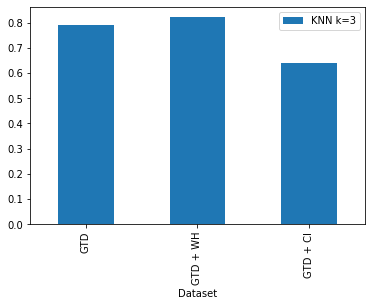

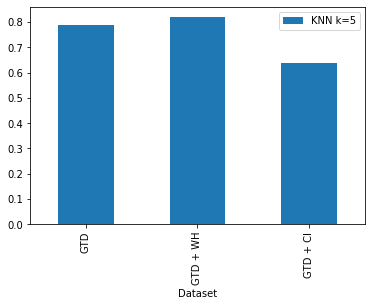

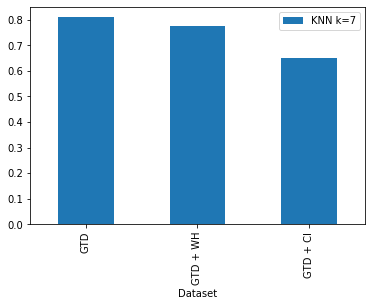

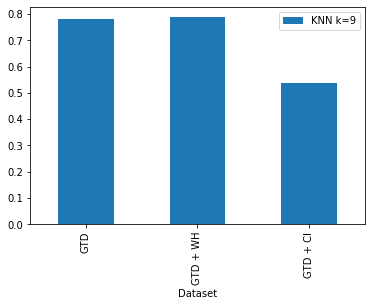

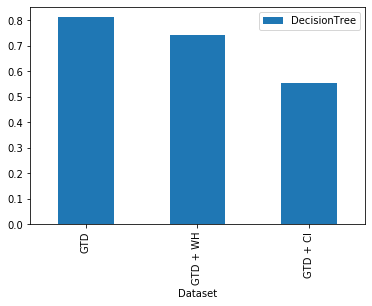

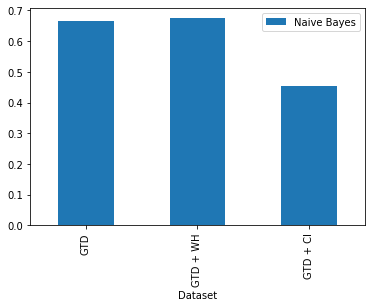

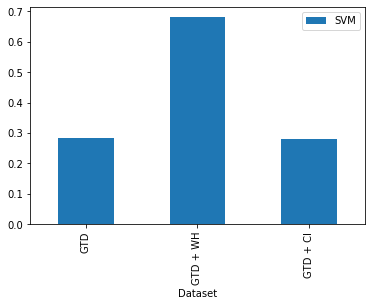

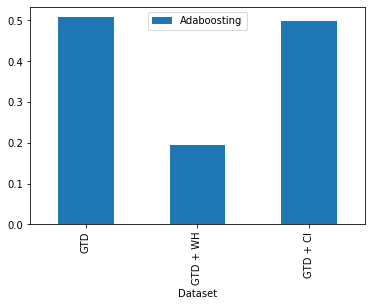

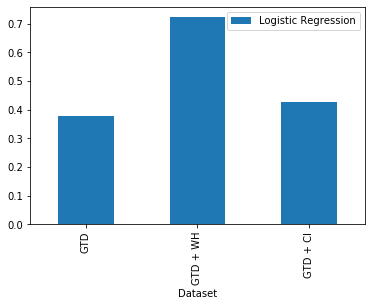

In [0]:
import matplotlib.pyplot as plt
df.plot(kind='bar',x='Dataset',y='KNN k=3')
df.plot(kind='bar',x='Dataset',y='KNN k=5')
df.plot(kind='bar',x='Dataset',y='KNN k=7')
df.plot(kind='bar',x='Dataset',y='KNN k=9')
df.plot(kind='bar',x='Dataset',y='DecisionTree')
df.plot(kind='bar',x='Dataset',y='Naive Bayes')
df.plot(kind='bar',x='Dataset',y='SVM')
df.plot(kind='bar',x='Dataset',y='Adaboosting')
df.plot(kind='bar',x='Dataset',y='Logistic Regression')






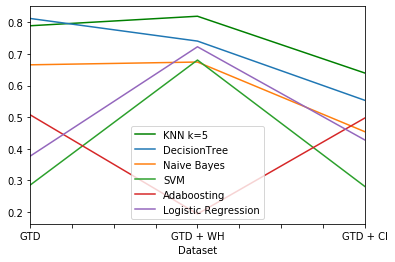

In [0]:
ax = plt.gca()

df.plot(kind='line',x='Dataset',y='KNN k=3', color='red', ax=ax)
df.plot(kind='line',x='Dataset',y='KNN k=5', color='green', ax=ax)
df.plot(kind='line',x='Dataset',y='KNN k=7', color='purple', ax=ax)
df.plot(kind='line',x='Dataset',y='KNN k=9' , ax=ax)
df.plot(kind='line',x='Dataset',y='DecisionTree', ax=ax)
df.plot(kind='line',x='Dataset',y='Naive Bayes', ax=ax)
df.plot(kind='line',x='Dataset',y='SVM', ax=ax)
df.plot(kind='line',x='Dataset',y='Adaboosting', ax=ax)
df.plot(kind='line',x='Dataset',y='Logistic Regression', ax=ax)


plt.show()

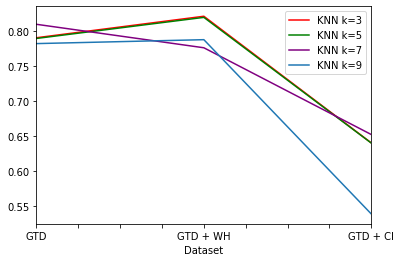

In [0]:
ax = plt.gca()

df.plot(kind='line',x='Dataset',y='KNN k=3', color='red', ax=ax)
df.plot(kind='line',x='Dataset',y='KNN k=5', color='green', ax=ax)
df.plot(kind='line',x='Dataset',y='KNN k=7', color='purple', ax=ax)
df.plot(kind='line',x='Dataset',y='KNN k=9' , ax=ax)
plt.show()

In [0]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  libcupsfilters1 libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0
  libkpathsea6 libpotrace0 libptexenc1 libruby2.5 libsynctex1 libtexlua52
  libtexluajit2 libzzip-0-13 lmodern poppler-data preview-latex-style rake
  ruby ruby-did-you-mean ruby-minitest ruby-net-telnet ruby-power-assert
  ruby-test-unit ruby2.5 rubygems-integration t1utils tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
Suggested packages:

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp /content/drive/'My Drive'/'Colab Notebooks'/assignment_3final.ipynb ./

In [0]:
!jupyter nbconvert --to PDF "assignment_3final.ipynb"


[NbConvertApp] Converting notebook assignment_3final.ipynb to PDF
[NbConvertApp] Writing 232933 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 173712 bytes to assignment_3final.pdf
